### Importing Libraries and loading dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()
# there a total 5 feature which are of type "int" and "float" 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# zero null value. 
df.shape

(9994, 13)

### Data preprocessing 

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# number of duplicate enteries 
df.duplicated().sum()

17

In [7]:
# dropping duplicate enteries 
df.drop_duplicates(inplace = True)

In [5]:
# dropping unwanted quantities 
df.drop(["Postal Code", 'Discount'], axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Profit        9994 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


### Getting insights from data 

Univariate Analysis

In [9]:
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Text(0.5, 1.0, 'Shipping mode wise distribution of orders')

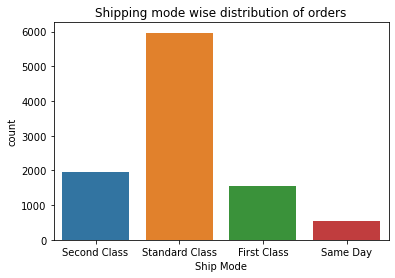

In [18]:
sns.countplot(x = df['Ship Mode'])
plt.title('Shipping mode wise distribution of orders')

In [20]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Segmentwise distribution of orders')

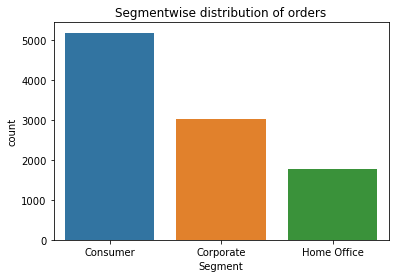

In [19]:
sns.countplot(x = df['Segment'])
plt.title('Segmentwise distribution of orders')

In [21]:
df['Country'].value_counts()
# all the orders are within the United states

United States    9994
Name: Country, dtype: int64

In [23]:
df['City'].value_counts().head(10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

Text(0.5, 1.0, 'Top 10 Cities having most order placed')

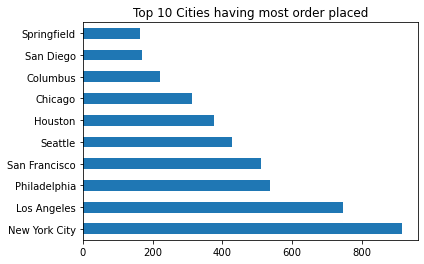

In [26]:
df['City'].value_counts().head(10).plot(kind = 'barh')
plt.title('Top 10 Cities having most order placed')

In [30]:
df['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

Text(0.5, 1.0, 'State wise orders distribution')

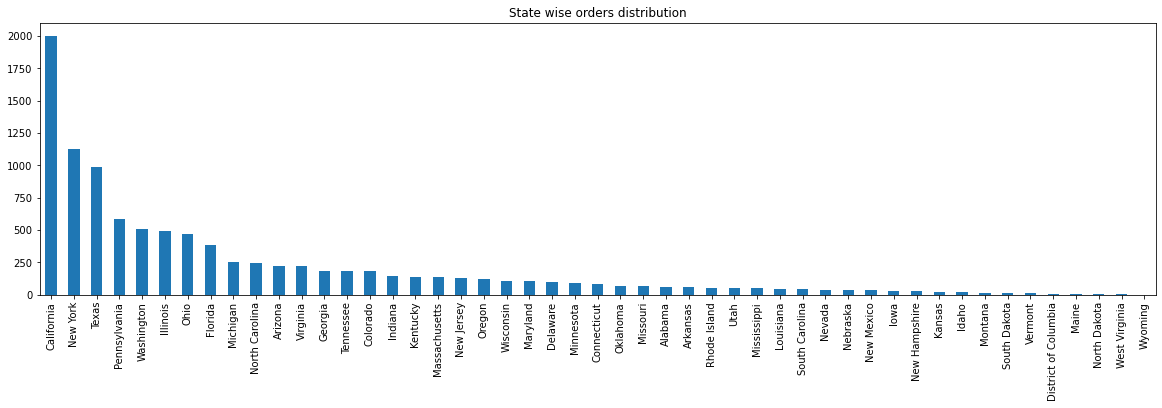

In [32]:
df['State'].value_counts().plot(kind = 'bar', figsize =[20, 5])
plt.title('State wise orders distribution')

In [34]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

Text(0.5, 1.0, 'Regionwise orders distribution')

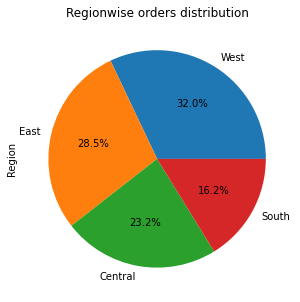

In [39]:
df['Region'].value_counts().plot(kind = 'pie', figsize=[5,5], autopct='%1.1f%%')
plt.title('Regionwise orders distribution')

In [13]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

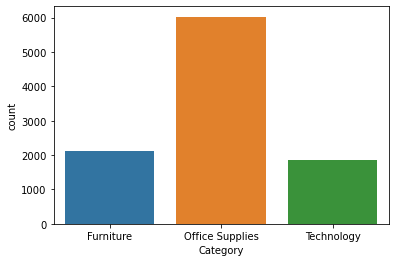

In [14]:
sns.countplot(x = df['Category'])

In [15]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:ylabel='Sub-Category'>

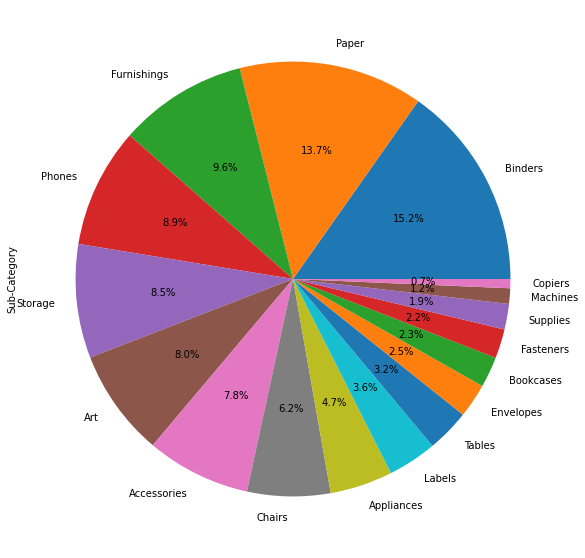

In [38]:
df['Sub-Category'].value_counts().plot(kind = 'pie', figsize = [10,10], autopct='%1.1f%%')

Bivariate Analysis

In [42]:
df.corr()

,Sales,Quantity,Profit
Sales,1.000000,0.200795,0.479064
Quantity,0.200795,1.000000,0.066253
Profit,0.479064,0.066253,1.000000


<AxesSubplot:>

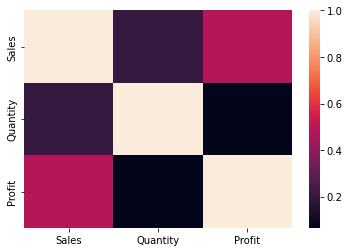

In [43]:
sns.heatmap(df.corr())

In [54]:
df.groupby("Category").sum()

,Sales,Quantity,Profit
Category,,,
Furniture,741999.7953,8028,18451.2728
Office Supplies,719047.0320,22906,122490.8008
Technology,836154.0330,6939,145454.9481


Text(0.5, 1.0, 'Sales vs Category')

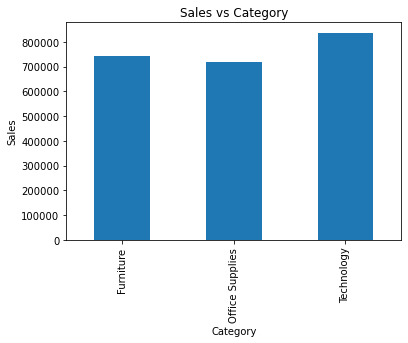

In [57]:
df.groupby("Category").sum().Sales.plot(kind = 'bar')
plt.ylabel('Sales')
plt.title('Sales vs Category')

In [61]:
df.groupby("Sub-Category").sum()

,Sales,Quantity,Profit
Sub-Category,,,
Accessories,167380.3180,2976,41936.6357
Appliances,107532.1610,1729,18138.0054
Art,27118.7920,3000,6527.7870
Binders,203412.7330,5974,30221.7633
Bookcases,114879.9963,868,-3472.5560
Chairs,328449.1030,2356,26590.1663
Copiers,149528.0300,234,55617.8249
Envelopes,16476.4020,906,6964.1767
Fasteners,3024.2800,914,949.5182


<AxesSubplot:xlabel='Sub-Category'>

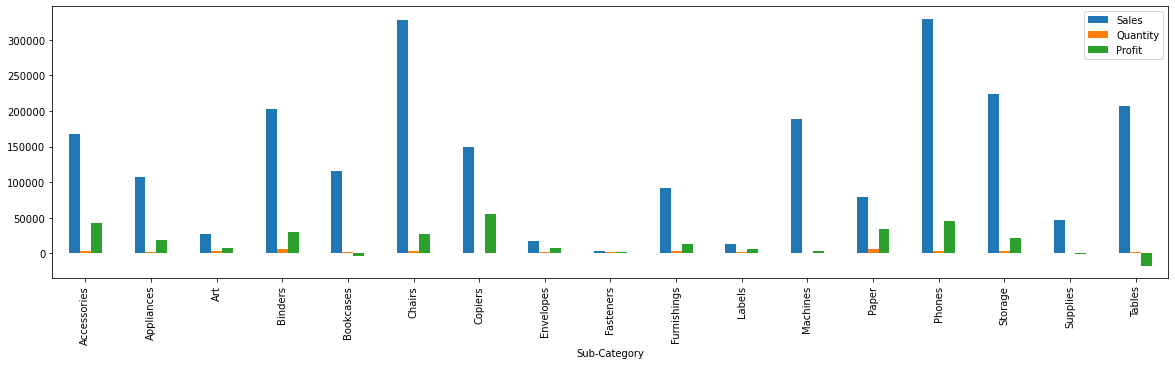

In [70]:
df.groupby("Sub-Category").sum().plot(kind = 'bar', figsize = [20,5])

In [79]:
df.groupby("Sub-Category").sum().Profit

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

### Conclusions
1) Most prefered shipping mode is Standard Class

2) Most number of orders is placed in New York City

3) In terms of state, most number of orders is placed in California.

4) In terms of category, Office-supplies are ordered the most.

5) Most profitable item to company is Copiers.

6) Most selling item is Binders